In [61]:
import torch
import pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
scene_dir = Path("output/test_new_repo/IMG_4202_IMG_4207")
cluster_cost_map_path = scene_dir / "cluster_cost_maps.pkl"
cluster_visible_map_path = scene_dir / "cluster_visible_maps.pkl"

local_cost_map_path = scene_dir / "cost_maps.pkl"
local_visible_map_path = scene_dir / "visible_maps.pkl"

cluster_cost_map = pickle.load(open(cluster_cost_map_path, "rb"))
cluster_visible_map = pickle.load(open(cluster_visible_map_path, "rb"))

local_cost_map = pickle.load(open(local_cost_map_path, "rb"))
local_visible_map = pickle.load(open(local_visible_map_path, "rb"))




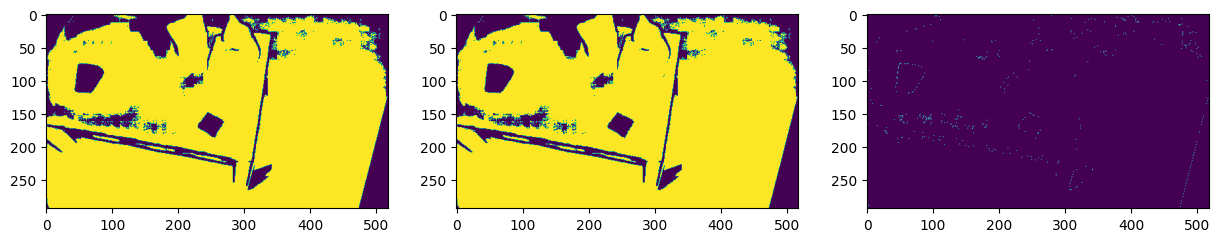

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((local_visible_map[0].float()).abs().cpu().numpy(), vmax = 1)
plt.subplot(1, 3, 2)
plt.imshow((cluster_visible_map[0].float()).abs().cpu().numpy(), vmax = 1)
plt.subplot(1, 3, 3)
plt.imshow((local_visible_map[0].float() - cluster_visible_map[0].float()).abs().cpu().numpy(), vmax = 1)
plt.show()

In [56]:
cluster_cost_map[0].shape, cluster_visible_map[0].shape, local_cost_map[0].shape, local_visible_map[0].shape

(torch.Size([3, 294, 518]),
 torch.Size([294, 518]),
 torch.Size([3, 294, 518]),
 torch.Size([294, 518]))

In [57]:
(cluster_cost_map[0] - local_cost_map[0]).abs()[0].shape

torch.Size([294, 518])

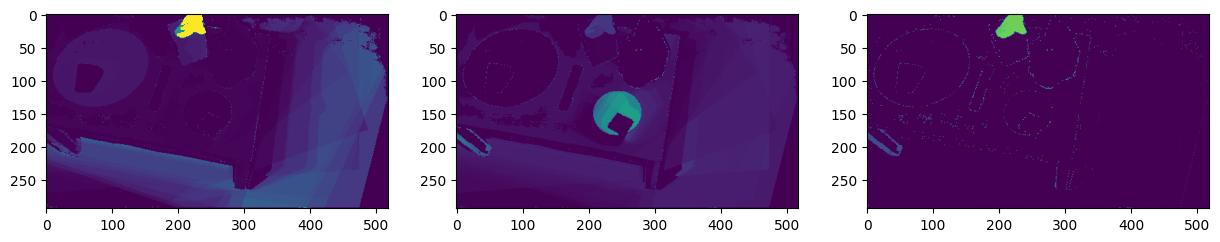

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((cluster_cost_map[0] - local_cost_map[0]).abs()[0].cpu().numpy(), vmax = 0.1)
plt.subplot(1, 3, 2)
plt.imshow((cluster_cost_map[0] - local_cost_map[0]).abs()[1].cpu().numpy(), vmax = 1)
plt.subplot(1, 3, 3)
plt.imshow((cluster_cost_map[0] - local_cost_map[0]).abs()[2].cpu().numpy(), vmax = 1)
plt.show()


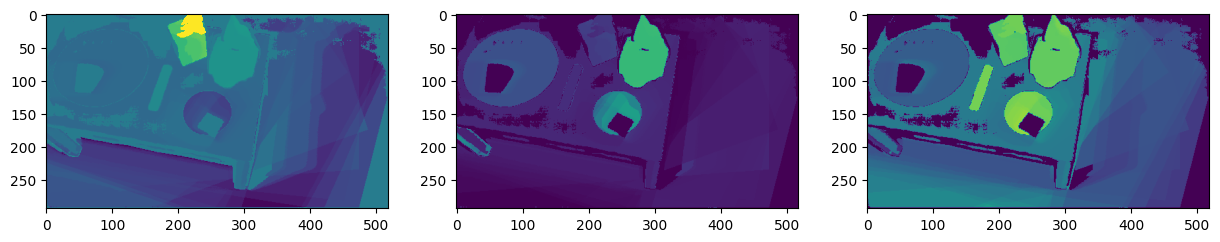

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((cluster_cost_map[0])[0].cpu().numpy(), vmax = 0.1)
plt.subplot(1, 3, 2)
plt.imshow((cluster_cost_map[0])[1].cpu().numpy(), vmax = 1)
plt.subplot(1, 3, 3)
plt.imshow((cluster_cost_map[0])[2].cpu().numpy(), vmax = 1)
plt.show()


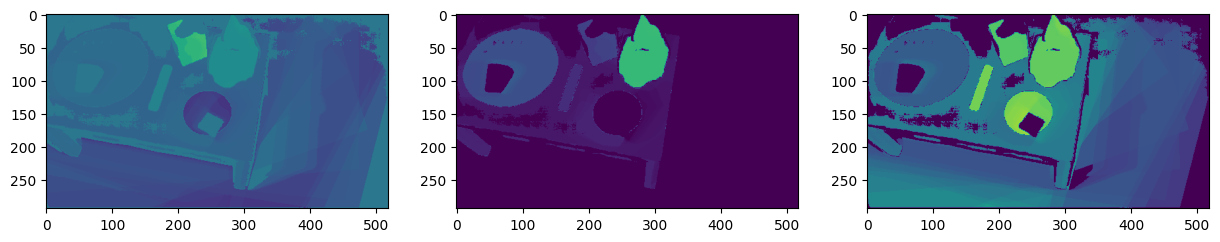

In [60]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow((local_cost_map[0])[0].cpu().numpy(), vmax = 0.1)
plt.subplot(1, 3, 2)
plt.imshow((local_cost_map[0])[1].cpu().numpy(), vmax = 1)
plt.subplot(1, 3, 3)
plt.imshow((local_cost_map[0])[2].cpu().numpy(), vmax = 1)
plt.show()


In [77]:
scene_dir = Path("output/test_new_repo/IMG_4270_IMG_4271_cluster_2")
cluster_output_path = scene_dir / "object_masks.pkl"
cluster_cost_map_1_path = scene_dir / "total_cost_maps_1_voxel.ply"
cluster_cost_map_2_path = scene_dir / "total_cost_maps_2_voxel.ply"

scene_dir = Path("output/test_new_repo/IMG_4270_IMG_4271")
local_output_path = scene_dir / "object_masks.pkl"
local_cost_map_1_path = scene_dir / "cost_map_1.ply"
local_cost_map_2_path = scene_dir / "cost_map_2.ply"

cluster_output = pickle.load(open(cluster_output_path, "rb"))
local_output = pickle.load(open(local_output_path, "rb"))

import open3d as o3d
import numpy as np

cluster_cost_map_1 = torch.from_numpy(np.asarray(o3d.io.read_point_cloud(cluster_cost_map_1_path).colors))
cluster_cost_map_2 = torch.from_numpy(np.asarray(o3d.io.read_point_cloud(cluster_cost_map_2_path).colors))

local_cost_map_1 = torch.from_numpy(np.asarray(o3d.io.read_point_cloud(local_cost_map_1_path).colors))
local_cost_map_2 = torch.from_numpy(np.asarray(o3d.io.read_point_cloud(local_cost_map_2_path).colors))






In [76]:
(cluster_cost_map_1 - local_cost_map_1).abs().mean(dim=0)

tensor([0.0008, 0.0018, 0.0002], dtype=torch.float64)

In [80]:
print(local_output.keys(),cluster_output.keys())

dict_keys(['H', 'W', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) dict_keys(['H', 'W', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


In [ ]:
from pycocotools import mask as mask_utils
# Compare the main keys
print("local_output keys:", local_output.keys())
print("cluster_output keys:", cluster_output.keys())

average_cost_diff = []
mask_diff = []
# Compare shapes and values of each relevant subkey
for key in local_output:
    if key in cluster_output:
        print(f"\nComparing key: {key}")
        if isinstance(local_output[key], dict) and isinstance(cluster_output[key], dict):
            # Multi-level dict -- print sizes and compare costs if present
            for subkey in local_output[key]:
                if subkey in cluster_output[key]:
                    print(f"  Subkey: {subkey}")
                    subd_local = local_output[key][subkey]
                    subd_cluster = cluster_output[key][subkey]
                    if isinstance(subd_local, dict) and isinstance(subd_cluster, dict):
                        for obj_ind in subd_local:
                            if obj_ind in subd_cluster:
                                print(f"    Object: {obj_ind}")
                                lcost = subd_local[obj_ind]['cost'] if 'cost' in subd_local[obj_ind] else None
                                ccost = subd_cluster[obj_ind]['cost'] if 'cost' in subd_cluster[obj_ind] else None
                                
                                local_mask = torch.tensor(mask_utils.decode(subd_local[obj_ind]['mask']))
                                cluster_mask = torch.tensor(mask_utils.decode(subd_cluster[obj_ind]['mask']))

                                average_cost_diff.append(np.abs(lcost - ccost))
                                mask_diff.append((local_mask - cluster_mask).abs().mean().item())
                    else:
                        print(f"    Subvalue types differ: local {type(subd_local)}, cluster {type(subd_cluster)}")
        else:
            # Try to compare as tensors or arrays
            try:
                lv = torch.as_tensor(local_output[key])
                cv = torch.as_tensor(cluster_output[key])
                print(f"  Tensor difference mean abs: {(lv - cv).abs().mean().item()}")
            except Exception as e:
                print(f"  Could not compare key {key}: {e}")
    else:
        print(f"Key \"{key}\" only in local_output")
for key in cluster_output:
    if key not in local_output:
        print(f"Key \"{key}\" only in cluster_output")

print(np.array(average_cost_diff).mean())

local_output keys: dict_keys(['H', 'W', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
cluster_output keys: dict_keys(['H', 'W', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

Comparing key: H
  Could not compare key H: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

Comparing key: W
  Could not compare key W: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

Comparing key: 0
  Subkey: video_1
    Object: 0
    Object: 1
    Object: 2
    Object: 3
    Object: 4
    Object: 5
    Object: 7
    Object: 8
    Object: 9
    Object: 10
  Subkey: video_2
    Object: 0
    Object: 5
    Object: 6
    Object: 7
    Object: 8

Comparing key: 1
  Subkey: video_1
    Object: 0
    Object: 1
  Subkey: video_2
    Object: 0
    Object: 1
    Object: 2
    Object: 3
    Object: 10

Comparing key: 2
  Subkey: video_1
    Object: 0
    Object: 6
  Subkey: video_2
    Ob

In [87]:
len(average_cost_diff)

96